# BM4H

This is a notebook to try something like what they did in [Bayesian Methods for Hackers](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_PyMC3.ipynb).

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

## Making data

Just to get things started, I'm going to construct two series of data.
Each of these series will be sampled from a respective Poisson distribution, each with different rate, $\lambda$.
The two datasets will then be spliced together.

In [51]:
# Constants
RATE_A = 10
RATE_B = 50
LENGTH_A = 50
LENGTH_B = 50

In [52]:
# Derived values
START_A = 0
END_A = START_A + LENGTH_A
START_B = LENGTH_A
END_B = START_B + LENGTH_B

In [53]:
def generate_data(rate, start, end):
    """
    A function to generate some data based on a Poisson distribution.
    Params:
        rate: the rate, lambda for the Poisson distribution.
        start: the start point for the data.
        end: the end point for the data.
    Returns:
        dataframe: a dat array of Poisson distributed samples.
    """
    data = pd.DataFrame()
    data['day'] = np.arange(start, end)
    data['vals'] = np.random.poisson(rate, end-start)
    return data

In [54]:
part_a = generate_data(RATE_A, START_A, END_A)

In [62]:
def plot_data(data):
    """
    A quick function to plot the data with the appropriate labels.
    """
    plt.figure(figsize=(8,8))
    plt.bar(data['day'], data['vals'])
    plt.xlabel('day')
    plt.ylabel('value')
    plt.show()

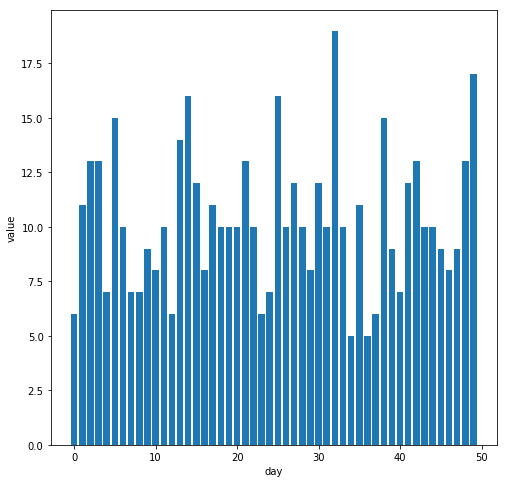

In [63]:
plot_data(part_a)

In [56]:
part_b = generate_data(RATE_B, START_B, END_B)

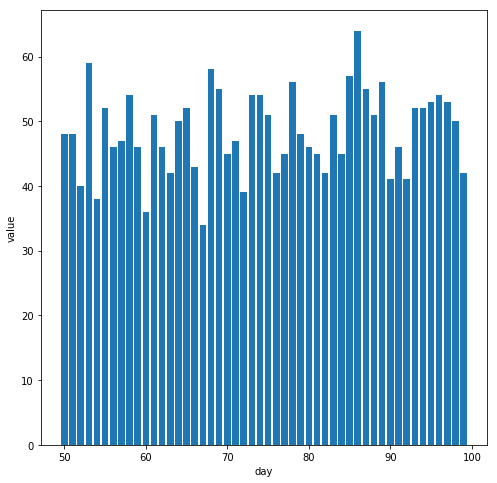

In [64]:
plot_data(part_b)

In [65]:
data = pd.concat([part_a, part_b])

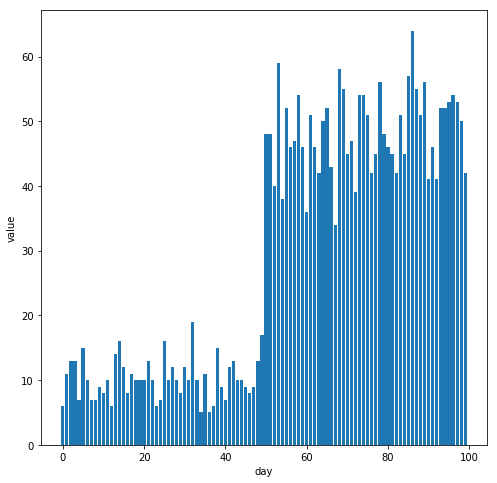

In [66]:
plot_data(data)

Ok, so it looks like we've got some data here.
Hopefully, it is clear that there are two separate behaviours going on.
Now we'd like to see if we can get the computer to identify this too.

In modelling terms, we know ourselves that for $0 \leq d \leq 50$ there is a lower rate of $\lambda_1 = 10$, and that for $50 \leq d \leq 100$ there is a higher rate of $\lambda_2 = 50$ - we want to see if we can automate the process by which we identify $\lambda_1$ and $\lambda_2$, and furthermore identify  the time, $\tau = 50$, at which this change happens.